## CNN을 활용한 말과 사람 이미지 분류

In [10]:
import os
import numpy as np
from PIL import Image
import random
from matplotlib import pyplot as plt
from tensorflow import keras

In [11]:
label = ["paper","rock","scissors"]

train_X = []
train_Y = []
test_X = []
test_Y = []

classes = os.listdir("data_images")
data = []
for i, cls in enumerate(classes):
    # print(cls)
    files = os.listdir(f"data_images/{cls}")
    for f in files:
        # print(f)
        img = Image.open(f"data_images/{cls}/{f}")
        data.append((np.asarray(img), i))
        img.close()
random.shuffle(data)
print(data)

[(array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [253, 253, 253

In [ ]:
for i in range(len(data)):
    if i < len(data) * 0.8:
        train_X.append(data[i][0]) # 이미지 데이터
        train_Y.append(data[i][1]) # 라벨 인덱스
    else:
        test_X.append(data[i][0])
        test_Y.append(data[i][1])

In [13]:
# 정규화 및 numpy 배열로 변환
train_X = np.array(train_X) / 255.0
test_X = np.array(test_X) / 255.0
train_Y = np.array(train_Y)
test_Y = np.array(test_Y)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(2032, 150, 150, 3) (2032,) (870, 150, 150, 3) (870,)


In [14]:
# 모델 구성
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(train_X, train_Y, epochs = 30, validation_data = (test_X, test_Y), callbacks = [early_stop])

model.summary()

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6969 - loss: 0.6858 - val_accuracy: 0.9080 - val_loss: 0.2499
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9828 - loss: 0.0800 - val_accuracy: 0.9943 - val_loss: 0.0215
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 1.0000 - loss: 6.0028e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 1.0000 - loss: 2.1528e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 1.0000 - loss: 1.6283e-04 - val_accuracy: 1.0000 - val_loss: 5.3022e-04
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 1.0000 - loss: 1.0026e-04 - val_accuracy: 1.0000 - val_loss: 5.8347e-04
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 1.0000 - loss: 7.0103e-0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,171 (1.50 MB)

 Trainable params: 130,723 (510.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 261,448 (1021.29 KB)

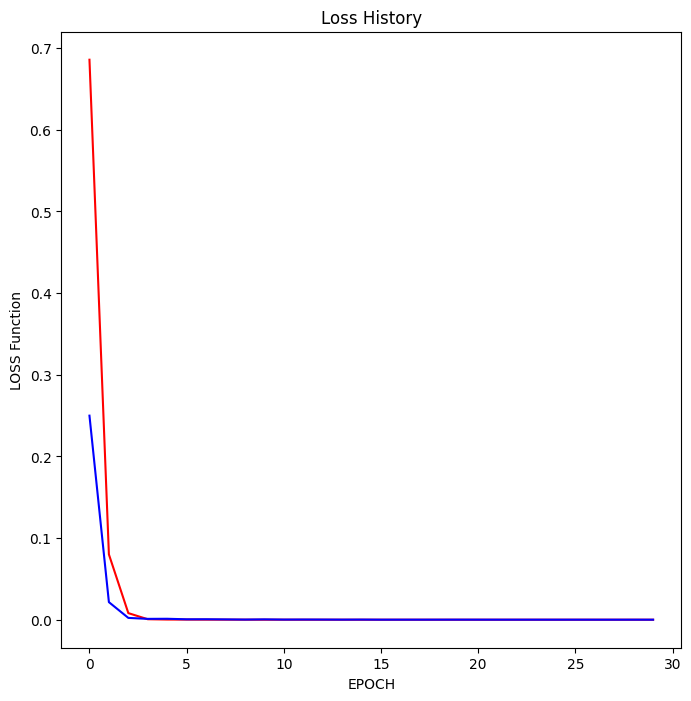

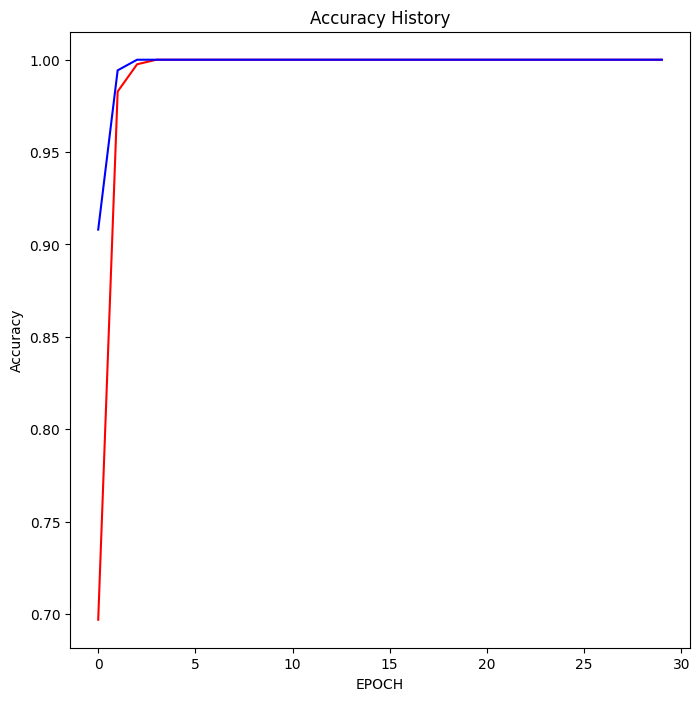

In [15]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


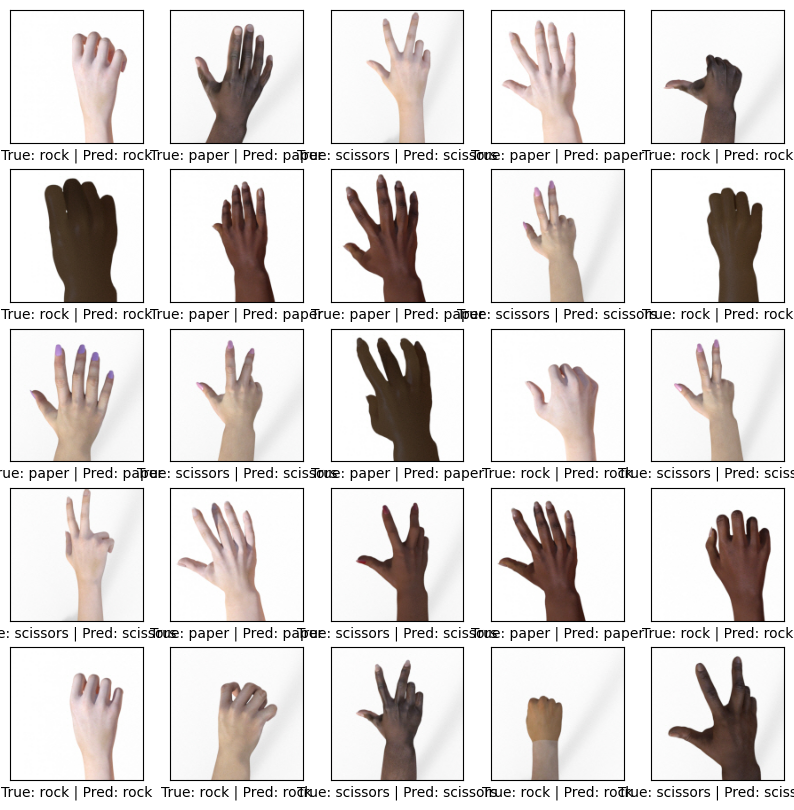

In [17]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    true_label = label[train_Y[i]]
    predicted_label = None
    if model is not None:
        # 예측 수행
        prediction = model.predict(np.expand_dims(train_X[i], axis=0))
        predicted_label = label[np.argmax(prediction)]
    plt.xlabel(f'True: {true_label} | Pred: {predicted_label if predicted_label else "N/A"}')
plt.show()